In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def read_clean_happy():
    df_2015 = pd.read_csv('data_happy/2015.csv')
    df_2015['year'] = 2015
    df_2015 = df_2015.drop(columns=['Standard Error'])
    df_2016 = pd.read_csv('data_happy/2016.csv')
    df_2016['year'] = 2016
    df_2016 = df_2016.drop(columns=['Lower Confidence Interval','Upper Confidence Interval'])
    df_2017 = pd.read_csv('data_happy/2017.csv')
    df_2017['year'] = 2017
    df_2017 = df_2017.merge(df_2015[['Country','Region']],on='Country')
    columnsTitles=['Country','Region', 'Happiness.Rank', 'Happiness.Score',
           'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
           'Freedom', 'Trust..Government.Corruption.', 'Generosity', 
           'Dystopia.Residual', 'year']
    df_2017 = df_2017.drop(columns=['Whisker.high', 'Whisker.low']).reindex(columns=columnsTitles)
    rename = {a:b for a,b in zip(df_2017.columns.tolist(),df_2015.columns.tolist())}
    df_2017.rename(columns=rename,inplace=True)
    happiness_df = pd.concat([df_2015,df_2016,df_2017])
    return happiness_df

In [11]:
happiness_df = read_clean_happy()

In [12]:
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [13]:
terrorism_df = pd.read_csv('data_happy/terrorism_df.csv',low_memory=False)
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
df_europe_terro = terrorism_df[terrorism_df.region_txt.str.contains('Europe')].rename(columns={'country_txt':'Country', 'iyear':'year'})
df_europe_happy = happiness_df[happiness_df.Region.str.contains('Europe')]

In [15]:
happines_score = df_europe_happy[['Country', 'Happiness Score', 'year']]
df_happy_score = df_europe_terro.merge(happines_score,on=['Country','year'])

In [16]:
target_citizen = df_happy_score[((df_happy_score.targsubtype1 == 75) | (df_happy_score.targsubtype1 == 67))]

In [54]:
df_attack_2015 = pd.DataFrame(df_europe_terro[df_europe_terro.year==2015].Country.value_counts()).reset_index().rename(columns={'index':'Country','Country':'Terror_attacks'})
df_attack_2016 = pd.DataFrame(df_europe_terro[df_europe_terro.year==2016].Country.value_counts()).reset_index().rename(columns={'index':'Country','Country':'Terror_attacks'})
df_attack_2017 = pd.DataFrame(df_europe_terro[df_europe_terro.year==2017].Country.value_counts()).reset_index().rename(columns={'index':'Country','Country':'Terror_attacks'})

In [55]:
df_attack_2015.head()

,Country,Terror_attacks
0,Ukraine,638
1,United Kingdom,115
2,Germany,66
3,France,37
4,Sweden,32


In [63]:
df_combi = df_europe_happy.merge(df_attack_2015,on=['Country'],how='left')
df_combi.fillna(value=0,inplace=True)
df_combi.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Terror_attacks
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,0.0
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,0.0
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,5.0
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,0.0
4,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015,9.0


In [18]:
# corr = df_combi.groupby(['country_txt', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Trust (Government Corruption)', 'Generosity',
#        'Dystopia Residual'])
# corr.style.background_gradient(cmap='coolwarm')

In [19]:
# group_2015 = df_combi[df_combi.year==2015][['Country', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Trust (Government Corruption)', 'Generosity',
#        'Dystopia Residual']].groupby('Country')

# group_2016 = df_combi[df_combi.year==2016][['Country', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Trust (Government Corruption)', 'Generosity',
#        'Dystopia Residual']].groupby('Country')

# group_2017 = df_combi[df_combi.year==2017][['Country', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Trust (Government Corruption)', 'Generosity',
#        'Dystopia Residual']].groupby('Country')

# dict_ = {}
# for i, g in group_2015:
#     dict_[i + '_2015'] = len(g)
    
# for i, g in group_2016:
#     dict_[i + '_2016'] = len(g)
    
# for i, g in group_2017:
#     dict_[i + '_2017'] = len(g)

In [66]:
corr = df_combi[df_combi.year==2015][['Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual','Terror_attacks']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Terror_attacks
Happiness Score,1,0.7,0.71,0.59,0.77,0.65,0.63,0.62,-0.12
Economy (GDP per Capita),0.7,1,0.58,0.79,0.49,0.39,0.31,0.08,-0.11
Family,0.71,0.58,1,0.39,0.62,0.32,0.44,0.18,0.09
Health (Life Expectancy),0.59,0.79,0.39,1,0.41,0.27,0.43,0.027,-0.092
Freedom,0.77,0.49,0.62,0.41,1,0.71,0.61,0.21,-0.11
Trust (Government Corruption),0.65,0.39,0.32,0.27,0.71,1,0.47,0.25,-0.063
Generosity,0.63,0.31,0.44,0.43,0.61,0.47,1,0.21,-0.0043
Dystopia Residual,0.62,0.08,0.18,0.027,0.21,0.25,0.21,1,-0.16
Terror_attacks,-0.12,-0.11,0.09,-0.092,-0.11,-0.063,-0.0043,-0.16,1


In [24]:
df_rank_v_terror = df_europe_happy.merge(df_europe_terro,on=['Country','year'],how='left')
df_rank_v_terror['Terror_attacks'] = df_rank_v_terror.apply(lambda x: dict_[x['Country'] + '_' + str(x['year'])], axis=1)

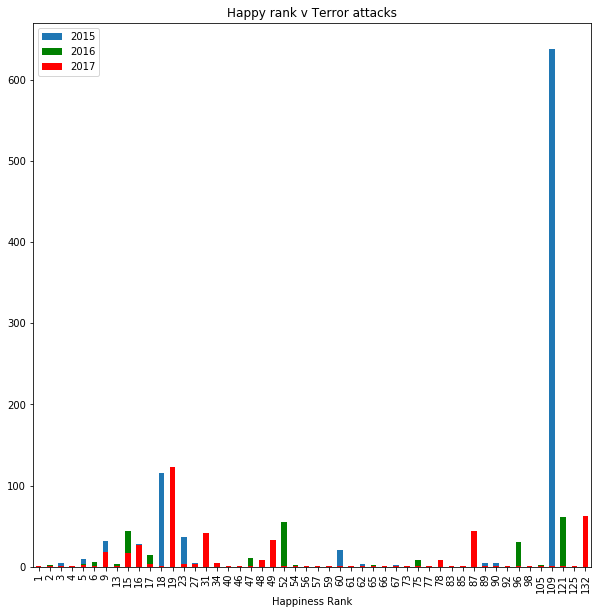

In [25]:
group_2015 = df_rank_v_terror[df_rank_v_terror.year==2015].groupby(['Country'])
group_2016 = df_rank_v_terror[df_rank_v_terror.year==2016].groupby(['Country'])
group_2017 = df_rank_v_terror[df_rank_v_terror.year==2017].groupby(['Country'])

ax = group_2015.mean().sort_values(by='Happiness Rank').plot.bar(x='Happiness Rank',y='Terror_attacks',figsize=(10,10))
group_2016.mean().sort_values(by='Happiness Rank').plot.bar(x='Happiness Rank',y='Terror_attacks',figsize=(10,10),ax=ax,color='g')
group_2017.mean().sort_values(by='Happiness Rank').plot.bar(x='Happiness Rank',y='Terror_attacks',figsize=(10,10),ax=ax,color='r')
plt.legend(['2015','2016','2017'])
plt.title('Happy rank v Terror attacks')
plt.show()

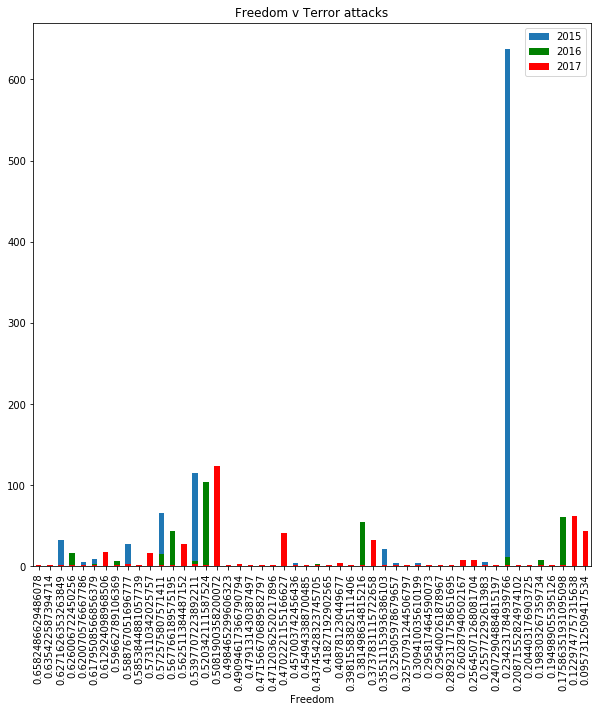

In [26]:
group_2015 = df_rank_v_terror[df_rank_v_terror.year==2015].groupby(['Country'])
group_2016 = df_rank_v_terror[df_rank_v_terror.year==2016].groupby(['Country'])
group_2017 = df_rank_v_terror[df_rank_v_terror.year==2017].groupby(['Country'])

ax = group_2015.mean().sort_values(by='Freedom',ascending=False).plot.bar(x='Freedom',y='Terror_attacks',figsize=(10,10))
group_2016.mean().sort_values(by='Freedom',ascending=False).plot.bar(x='Freedom',y='Terror_attacks',figsize=(10,10),ax=ax,color='g')
group_2017.mean().sort_values(by='Freedom',ascending=False).plot.bar(x='Freedom',y='Terror_attacks',figsize=(10,10),ax=ax,color='r')
plt.legend(['2015','2016','2017'])
plt.title('Freedom v Terror attacks')
plt.show()